<a href="https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/hw02/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework #2

> Note: sometimes your answer does not exactly match one of the options. This is normal.
Choose the option that is closest to your solution.

### Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.__version__

'2.2.2'

### Отримання даних

Для цього домашнього завдання ми будемо використовувати набір даних про паливну ефективність автомобілів.

In [4]:
# Оскільки wget може не бути встановленим, краще завантажити дані напряму за допомогою Pandas
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df_original = pd.read_csv(url)
df_original.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


*   `engine_displacement`: Об'єм двигуна автомобіля.
*   `num_cylinders`: Кількість циліндрів у двигуні.
*   `horsepower`: Потужність двигуна в кінських силах.
*   `vehicle_weight`: Вага автомобіля.
*   `acceleration`: Час розгону автомобіля.
*   `model_year`: Рік випуску моделі автомобіля.
*   `origin`: Країна-виробник або регіон походження автомобіля.
*   `fuel_type`: Тип палива, яке використовує автомобіль (наприклад, Gasoline, Diesel).
*   `drivetrain`: Тип приводу автомобіля (наприклад, Front-wheel drive, All-wheel drive).
*   `num_doors`: Кількість дверей автомобіля.
*   `fuel_efficiency_mpg`: Паливна ефективність автомобіля, виміряна в милях на галон (Miles Per Gallon). Це цільова змінна, яку ми прогнозуємо.

#### Кількість записів

In [5]:
len(df_original)

9704

Мета цього домашнього завдання - створити регресійну модель для прогнозування паливної ефективності автомобіля (колонка `'fuel_efficiency_mpg'`).

### Підготовка набору даних

Використовуйте лише наступні колонки:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [6]:
columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
    ]

## Exploratory data analysis

In [7]:
df = df_original[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


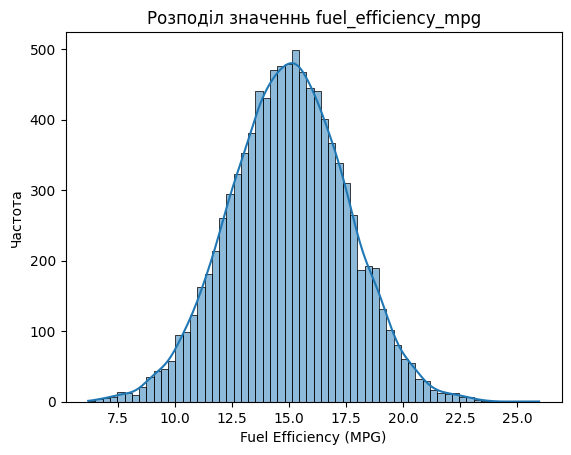

In [8]:
sns.histplot(df['fuel_efficiency_mpg'], kde=True)

plt.title('Розподіл значеннь fuel_efficiency_mpg')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Частота')
plt.show()

🧐 **Ні, у цьому випадку "довгого хвоста" немає.**

На цьому графіку розподілу **fuel_efficiency_mpg** ми бачимо класичну **нормальну (гаусівську) криву** — симетричну, дзвоноподібну форму, де більшість значень згруповані навколо середнього, а частота поступово зменшується в обидва боки.

🔍 **Ознаки, що це не "довгий хвіст":**
- Розподіл симетричний.
- Немає сильно витягнутої правої або лівої частини з рідкісними, але численними значеннями.
- Частота швидко спадає до нуля на краях, без "плато" або повільного згасання.

📌 **А як виглядає "довгий хвіст"?**
Це коли:
- Є **асиметрія** — хвіст тягнеться далеко вправо або вліво.
- Частота рідкісних значень **не нульова**, а поступово зменшується.
- Наприклад, у розподілі доходів: кілька людей мають надзвичайно високі доходи, які утворюють довгий правий хвіст.

  ![long_tail]('https://uk.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B3%D0%B8%D0%B9_%D1%85%D0%B2%D1%96%D1%81%D1%82#/media/%D0%A4%D0%B0%D0%B9%D0%BB:Long_tail.svg')

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



### Питання 1. Пропущені значення

Скільки стовпців у наборі даних мають пропущені значення?

In [10]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


Пропущені значення є у стовпці `horsepower`.

In [11]:
df['horsepower'].isnull().sum()

np.int64(708)

### Питання 2

Яка медіана (50-й процентиль) для змінної `'horsepower'`?

- 49
- 99
- 149
- 199

In [12]:
df.horsepower.describe()[['count','mean','25%','50%', '75%']].round(0)

,horsepower
count,8996.0
mean,150.0
25%,130.0
50%,149.0
75%,170.0


Q2: *149*

### **Підготуйте та розділіть набір даних**

* Перемішайте набір даних використовуйте seed `42`.
* Розділіть ваші дані на навчальний/валідаційний/тестовий набори
у співвідношенні 60%/20%/20%.

Використовуйте той же код, що і в лекціях

In [13]:
# Розділяємо дані на навчальний набір (60%) і тимчасовий набір (40%)
# shuffle=True є стандартним, а random_state забезпечує відтворюваність
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)

# Тепер розділяємо тимчасовий набір (40%) на валідаційний (20%) і тестовий (20%)
# 0.5 * 0.4 = 0.2, тому test_size=0.5
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Перевіряємо розміри наборів
print(f"Кількість записів у початковому наборі: {len(df)}")
print(f"Розмір навчального набору: {len(df_train)}")
print(f"Розмір валідаційного набору: {len(df_val)}")
print(f"Розмір тестового набору: {len(df_test)}")

# Можете переглянути перші декілька рядків кожного набору
print("\nНавчальний набір (перші 3 рядки):")
df_train.head(3)

Кількість записів у початковому наборі: 9704
Розмір навчального набору: 5822
Розмір валідаційного набору: 1941
Розмір тестового набору: 1941

Навчальний набір (перші 3 рядки):


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,240,137.0,2471.172629,2010,17.697460
1,240,127.0,4044.606636,2000,9.298735
2,280,NaN,3039.297482,2011,14.724394


### Питання 3

**Заповнення пропущених значень**

* Нам потрібно розібратися з відсутніми значеннями для колонки з Питання 1 (df['horsepower']).
* У нас є два варіанти заповнити їх:
    - `0`;
    - або середнім значенням цієї змінної.
* Спробуйте обидва варіанти.
* Для кожного навчіть модель лінійної регресії без регуляризації, використовуючи код з уроків.
* Для обчислення середнього використовуйте лише навчальний набір!

Перевіримо, чи залишились пропущені значення:

In [14]:
df['horsepower'].isnull().sum()

np.int64(708)

* Використовуйте валідаційний набір даних для оцінки моделей та порівняння RMSE кожного варіанту.
* Округліть показники RMSE до 2 десяткових знаків за допомогою `round(score, 2)`
* Який варіант дає кращий RMSE?

Ваші дані вже розділені, і у вас є три DataFrame: df_train, df_val, df_test. Також припустимо, що цільовою змінною є fuel_efficiency_mpg, а решта —ознаками.

  План дій:
   1. Підготовка: Визначимо список ознак (features) і цільову змінну (target).
   2. Стратегія 1: Заповнення нулем (`0`)
       * Створимо копії наборів даних, щоб не змінювати оригінали.
       * Заповнимо пропущені значення в horsepower нулем.
       * Підготуємо матриці ознак X та вектори цільової змінної y.
       * Навчимо модель лінійної регресії.
   3. Стратегія 2: Заповнення середнім значенням
       * Створимо нові копії наборів даних.
       * Обчислимо середнє значення horsepower лише на навчальному наборі (`df_train`).
       * Заповнимо пропущені значення цим середнім у всіх трьох наборах.
       * Підготуємо матриці X та вектори y.
       * Навчимо другу модель лінійної регресії.
   4. Оцінка: Щоб порівняти, яка стратегія краща, обчислимо помилку (наприклад, RMSE) на валідаційному наборі для кожної моделі.

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [16]:
# У вас є df_train, df_val, df_test
# Визначимо ознаки та цільову змінну
features = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',]
target = 'fuel_efficiency_mpg'


# --- Стратегія 1: Заповнення пропущених значень нулем ---

print("--- Стратегія 1: Заповнення нулем ---")
# Створюємо копії, щоб не змінювати оригінальні дані
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()

# Заповнюємо пропуски нулем
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)
df_val_zero['horsepower'] = df_val_zero['horsepower'].fillna(0)

print("Перевірка пропущенних значень:", df_train_zero['horsepower'].isnull().sum() + df_val_zero['horsepower'].isnull().sum())

# Готуємо дані для моделі
X_train_zero = df_train_zero[features].values
y_train = df_train_zero[target].values

# Навчаємо модель за допомогою custom функції
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)


print("Модель, навчена на даних із заповненням нулем, готова.")
# Оцінимо на валідаційному наборі
X_val_zero = df_val_zero[features].values
y_val = df_val_zero[target].values
# Додаємо стовпець одиниць для вільного члена
X_val_zero = np.column_stack([np.ones(X_val_zero.shape[0]), X_val_zero])

y_pred_zero = X_val_zero.dot(np.concatenate([[w0_zero], w_zero]))

rmse_zero = np.sqrt(mean_squared_error(y_val, y_pred_zero))
print(f"RMSE на валідаційному наборі (заповнення нулем): {rmse_zero:.4f}\n")

--- Стратегія 1: Заповнення нулем ---
Перевірка пропущенних значень: 0
Модель, навчена на даних із заповненням нулем, готова.
RMSE на валідаційному наборі (заповнення нулем): 0.5173



In [17]:
# --- Стратегія 2: Заповнення середнім значенням ---

print("--- Стратегія 2: Заповнення середнім ---")
# Створюємо копії
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

# Обчислюємо середнє ТІЛЬКИ на навчальному наборі
mean_hp = df_train_mean['horsepower'].mean()
print(f"Середнє значення 'horsepower' на навчальному наборі: {mean_hp:.4f}")

# Заповнюємо пропуски середнім значенням в обох наборах
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_hp)

# Готуємо дані для моделі
X_train_mean = df_train_mean[features].values
y_train = df_train_mean[target].values # y_train такий самий

# Навчаємо модель за допомогою custom функції
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)


print("Модель, навчена на даних із заповненням середнім, готова.")
# Оцінимо на валідаційному наборі
X_val_mean = df_val_mean[features].values
y_val = df_val_mean[target].values

# Додаємо стовпець одиниць для вільного члена
X_val_mean = np.column_stack([np.ones(X_val_mean.shape[0]), X_val_mean])
y_pred_mean = X_val_mean.dot(np.concatenate([[w0_mean], w_mean]))

rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print(f"RMSE на валідаційному наборі (заповнення середнім): {rmse_mean:.4f}\n")


# --- Висновок ---
print("--- Результати ---")
print(f"RMSE (заповнення нулем): {rmse_zero:.2f}")
print(f"RMSE (заповнення середнім): {rmse_mean:.2f}")

if rmse_mean <= rmse_zero:
    print("Стратегія заповнення середнім значенням дала кращий результат (меншу помилку).")
else:
    print("Стратегія заповнення нулем дала кращий результат (меншу помилку).")

--- Стратегія 2: Заповнення середнім ---
Середнє значення 'horsepower' на навчальному наборі: 149.7521
Модель, навчена на даних із заповненням середнім, готова.
RMSE на валідаційному наборі (заповнення середнім): 0.4604

--- Результати ---
RMSE (заповнення нулем): 0.52
RMSE (заповнення середнім): 0.46
Стратегія заповнення середнім значенням дала кращий результат (меншу помилку).


### Питання 4

* Тепер навчимо регуляризовану лінійну регресію.
* Для цього питання заповніть пропущені значення 0.
* Спробуйте різні значення `r` з цього списку: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Використовуйте RMSE для оцінки моделі на валідаційному наборі даних.
* Округліть показники RMSE до 2 десяткових знаків.
* Яке `r` дає найкращий RMSE?

Що таке регуляризація?
Уявіть, що ви навчаєте модель. Вона може стати настільки "розумною", що запам'ятає навчальні дані, включно з усім шумом та випадковими особливостями, замість того, щоб вивчити загальні закономірності. Це називається перенавчанням (overfitting). Така модель буде чудово працювати на даних, які вона вже бачила, але покаже погані результати на нових, незнайомих даних (наприклад, на валідаційному чи тестовому наборі).

Регуляризація — це техніка, яка допомагає боротися з перенавчанням. Вона працює, додаючи "штраф" до функції втрат моделі за надмірну складність.

Простими словами, ми говоримо моделі: "Будь якомога точнішою, але не ускладнюй себе занадто сильно".

Як це працює в лінійній регресії?
У лінійній регресії складність моделі визначається величиною її коефіцієнтів (ваг) при кожній ознаці. Якщо коефіцієнти дуже великі, це означає, що модель сильно реагує навіть на невеликі зміни у вхідних даних, що є ознакою перенавчання.

Регуляризація додає до функції втрат штраф, пропорційний розміру цих коефіцієнтів. Це змушує модель утримувати коефіцієнти якомога меншими.

r = 0: Немає штрафу. Це звичайна лінійна регресія.
Маленьке r (напр., 0.01): Невеликий штраф. Модель все ще може бути складною.
Велике r (напр., 100): Сильний штраф. Модель змушена робити коефіцієнти дуже маленькими, стаючи простішою.
Чому ми її використовували у завданні?
У питанні 4 ми якраз і досліджували ефект регуляризації.

Мета: Ми хотіли перевірити, чи допоможе регуляризація покращити якість нашої моделі (тобто зменшити помилку RMSE на валідаційних даних).

Варіанти:

- 0
- 0.01
- 1
- 10
- 100

In [18]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [20]:
# Дані df_train_zero та df_val_zero вже мають заповнені нулями пропущені значення 'horsepower'
# X_train_zero та y_train також підготовлені з попереднього кроку (Питання 3)
# X_val_zero та y_val також підготовлені з попереднього кроку (Питання 3)

best_rmse = float('inf')
best_r = None

print("Дослідження регуляризації з різними значеннями r:")

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Навчаємо модель за допомогою custom функції train_linear_regression_reg
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    # Робимо прогнози на валідаційному наборі
    # Об'єднуємо w0 та w для використання в dot product
    weights_full = np.concatenate(([w0], w))

    y_pred = X_val_zero.dot(weights_full)

    # Обчислюємо RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    print(f'r={r}, RMSE={round(rmse, 3)}')

    if rmse < best_rmse:
       best_rmse = rmse
       best_r = r

print(f'\nНайкращий RMSE дає r = {best_r}')

Дослідження регуляризації з різними значеннями r:
r=0, RMSE=0.517
r=0.01, RMSE=0.518
r=0.1, RMSE=0.521
r=1, RMSE=0.525
r=5, RMSE=0.526
r=10, RMSE=0.526
r=100, RMSE=0.526

Найкращий RMSE дає r = 0


### Питання 5

* Ми використовували seed 42 для розділення даних. Давайте з'ясуємо, як вибір seed впливає на наш результат.
* Спробуйте різні значення seed: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* Для кожного seed виконайте розділення на навчальний/валідаційний/тестовий набори у співвідношенні 60%/20%/20%.
* Заповніть відсутні значення 0 і навчіть модель без регуляризації.
* Для кожного seed оцініть модель на валідаційному наборі даних та зберіть показники RMSE.
* Яке стандартне відхилення всіх показників? Щоб обчислити стандартне відхилення, використовуйте `np.std`.
* Округліть результат до 3 десяткових знаків (`round(std, 3)`)

Яке значення std?

- 0.001
- 0.006
- 0.060
- 0.600

In [ ]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Розділення даних з поточним seed
    df_train, df_temp = train_test_split(df, test_size=0.4, random_state=seed)
    df_val, _ = train_test_split(df_temp, test_size=0.5, random_state=seed)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Заповнення пропущених значень нулем
    df_train_filled = df_train.fillna(0)
    df_val_filled = df_val.fillna(0)

    # Підготовка даних для моделі
    X_train = df_train_filled[features].values
    y_train = df_train_filled[target].values
    X_val = df_val_filled[features].values
    y_val = df_val_filled[target].values

    # Навчання моделі
    w0, w = train_linear_regression(X_train_mean, y_train)
    X_val = np.column_stack([np.ones(X_val.shape[0]), X_val])
    y_pred = X_val.dot(np.concatenate([[w0], w]))
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    print(f'Seed: {seed}, RMSE: {round(rmse, 3)}')

std_deviation = np.std(rmse_scores)
print(f'\nСтандартне відхилення показників RMSE: {round(std_deviation, 3)}')

### Питання 6

* Розділіть набір даних, як і раніше, використовуйте seed 9.
* Об'єднайте навчальний та валідаційний набори даних.
* Заповніть відсутні значення 0 і навчіть модель з `r=0.001`.
* Який RMSE на тестовому наборі даних?

Варіанти:

- 0.15
- 0.515
- 5.15
- 51.5

In [ ]:
# 1. Розділення даних з seed=9
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=9)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=9)

# 2. Об'єднання навчального та валідаційного наборів
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# 3. Заповнення пропущених значень нулем
df_full_train_filled = df_full_train.fillna(0)
df_test_filled = df_test.fillna(0)

# Підготовка даних
X_full_train = df_full_train_filled[features].values
y_full_train = df_full_train_filled[target].values
X_test = df_test_filled[features].values
y_test = df_test_filled[target].values

# 4. Навчання моделі за допомогою custom функції train_linear_regression_reg з r=0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# 5. Оцінка на тестовому наборі
X_test_with_ones = np.column_stack([np.ones(X_test.shape[0]), X_test]) # Додаємо стовпець одиниць для вільного члена
weights_full = np.concatenate(([w0], w)) # Об'єднуємо w0 та w для використання в dot product
y_pred_test = X_test_with_ones.dot(weights_full)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'RMSE на тестовому наборі: {round(rmse_test, 3)}')